# Lab 8 Tasks - Solution

In this lab we will use NumPy to load and analyse daily temperature data collected for Sydney, Australia in 2016. The dataset contains 4 columns:

- *MinTemp*: Minimum daily temperature (Degrees Celsius)
- *MaxTemp*: Maximum daily temperature (Degrees Celsius)
- *Temp9am*: Temperature at 9am (Degrees Celsius)
- *Temp3pm*: Temperature at 3pm (Degrees Celsius)

## Task 1 

Use the Python *urllib.request* to download a numeric dataset in CSV (comma-separated) format and save it to disk: 

http://mlg.ucd.ie/modules/COMP41680/temperature.csv

Use NumPy to load this dataset into a 2D NumPy array. Note that you should skip the first row of the file. See:

https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

Check the size of the array which has been loaded.

In [37]:
import urllib.request

url = "http://mlg.ucd.ie/modules/COMP41680/temperature.csv"
response = urllib.request.urlopen(url)
raw_csv = response.read().decode()
with open('temperatures.csv', 'w') as csvfile:
    csvfile.write(raw_csv)

In [38]:
import numpy as np

data = np.loadtxt("temperatures.csv", delimiter=",", skiprows=1)
print(data.shape)
data

(731, 4)


array([[21.4, 28.4, 25.2, 27.5],
       [21.2, 28.5, 23.2, 26.3],
       [22. , 28.8, 26.3, 27.7],
       ...,
       [22.6, 36.6, 28.1, 31.8],
       [23.9, 33.3, 27.3, 32.1],
       [24.1, 30. , 27.7, 26.4]])

## Task 2

Calculate basic summary statistics for the overall data.

In [39]:
print(f"Range is [{data.min():.1f}, {data.max():.1f}]")
print(f"Mean is {data.mean():.1f}")
print(f"Standard deviation is {data.std():.1f}")

Range is [5.0, 40.9]
Mean is 19.7
Standard deviation is 5.7


Calculate basic summary statistics for each column in the data (corresponding to MinTemp, MaxTemp, Temp9am, Temp3pm):

In [40]:
col_min = np.min(data, axis=0)
col_max = np.max(data, axis=0)
col_mean = np.mean(data, axis=0)
col_std = np.std(data, axis=0)
for col in range(data.shape[1]):
    print(
        f"Column {col}: Range [{col_min[col]}, {col_max[col]}], Mean {col_mean[col]}, Standard deviation {col_std[col]}")

Column 0: Range [5.0, 27.1], Mean 15.176470588235302, Standard deviation 4.631867149304542
Column 1: Range [11.7, 40.9], Mean 23.493980848153228, Standard deviation 4.672941219241275
Column 2: Range [6.7, 32.4], Mean 18.270177838577276, Standard deviation 5.005068549568897
Column 3: Range [11.0, 40.7], Mean 21.934746922024623, Standard deviation 4.455006471947006


Calculate the number of days where the maximum temperature was above 30 degrees Celsius.

In [41]:
np.sum(data[:, 1] > 30)

50

## Task 3

Create a scatter plot comparing the values the minimum and maximum temperatures for each day.

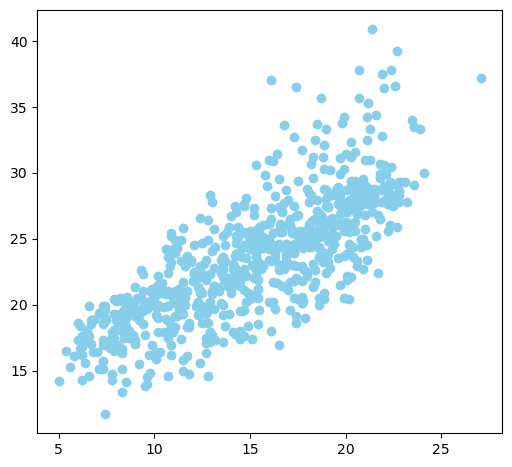

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5.5))
_ = plt.scatter(data[:, 0], data[:, 1], color="skyblue")

Calculate the temperature range for each day (i.e. the difference between the maximum and minimum temperature).

Plot these range values visually using a histogram containing 5 bins.

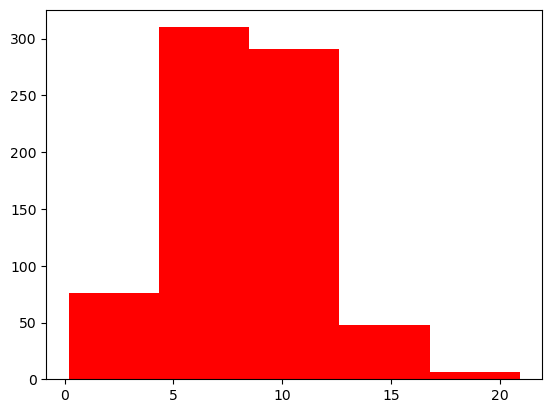

In [43]:
temp_range = data[:, 1] - data[:, 0]
_ = plt.hist(temp_range, bins=5, color="red")

Create a scatter plot comparing the values the temperatures at 9am and 3pm for each day.

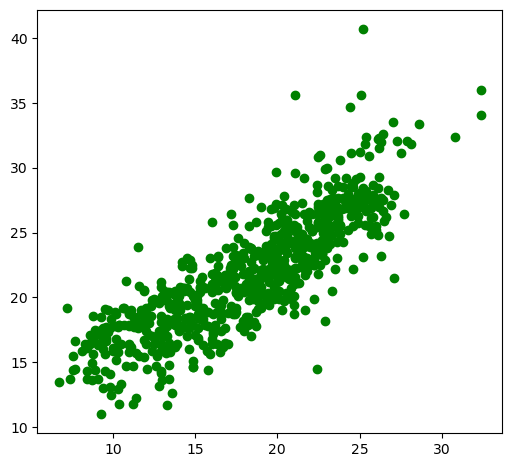

In [44]:
plt.figure(figsize=(6, 5.5))
_ = plt.scatter(data[:, 2], data[:, 3], color="green")

Calculate the differences between the temperatures at 9am and 3pm for each data. What is the mean difference?

On how many days was the temperature warmer at 9am than 3pm?

In [45]:
temp_diff = data[:, 3] - data[:, 2]
print(round(temp_diff.mean(), 2), np.sum(temp_diff < 0))

3.66 51


## Task 4

Create a new version of the dataset where all of the Celsisus temperatures have been converted to Fahrenheit (see [here](https://www.metric-conversions.org/temperature/celsius-to-fahrenheit.htm)).

In [46]:
data2 = (data * 1.8) + 32
data2

array([[70.52, 83.12, 77.36, 81.5 ],
       [70.16, 83.3 , 73.76, 79.34],
       [71.6 , 83.84, 79.34, 81.86],
       ...,
       [72.68, 97.88, 82.58, 89.24],
       [75.02, 91.94, 81.14, 89.78],
       [75.38, 86.  , 81.86, 79.52]])

Create a scatter plot of the maximum daily temperature in Celsius and maximum daily temperature in Fahrenheit.

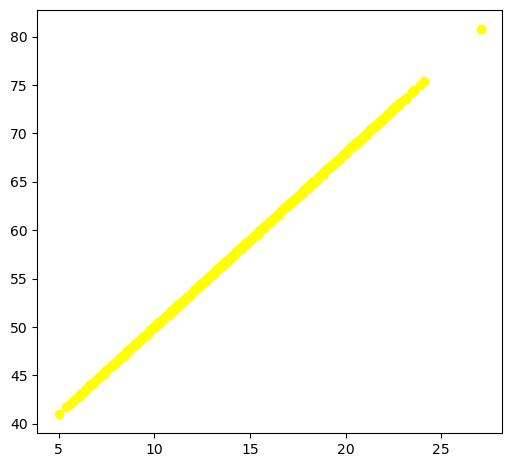

In [47]:
plt.figure(figsize=(6, 5.5))
_ = plt.scatter(data[:,0], data2[:,0], color="yellow")

## Task 5

Normalise the new Fahrenheit version of the data by applying **min-max normalisation** to each of the columns in the DataFrame.

Then display updated summary statistics for the data.

In [48]:
min_values = np.min(data2, axis=0)
max_values = np.max(data2, axis=0)
data3 = (data2 - min_values) / (max_values - min_values)
data3

array([[0.74208145, 0.57191781, 0.71984436, 0.55555556],
       [0.73303167, 0.57534247, 0.64202335, 0.51515152],
       [0.76923077, 0.58561644, 0.76264591, 0.56228956],
       ...,
       [0.79638009, 0.85273973, 0.83268482, 0.7003367 ],
       [0.85520362, 0.73972603, 0.80155642, 0.71043771],
       [0.86425339, 0.62671233, 0.81712062, 0.51851852]])

In [49]:
print(f"Range is [{data3.min():.1f}, {data3.max():.1f}]")
print(f"Mean is {data3.mean():.1f}")
print(f"Standard deviation is {data3.std():.1f}")

Range is [0.0, 1.0]
Mean is 0.4
Standard deviation is 0.2


## Task 6

Export the final normalized version of the Fahrenheit data as a comma-separated text file, where values are stored rounded to 3 decimal places.

In [50]:
np.savetxt("temperature-norm-fahrenheit.csv", data3, "%.3f", ",")